# Car Price Prediction

In [73]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#Loading the dataset
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data Preprocessing

In [75]:
#Checking the shape of the dataset
df.shape

(301, 9)

In [76]:
#Checking for the null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [77]:
#checking for duplicate values
df.duplicated().sum()

2

In [78]:
#removing the duplicate values
df.drop_duplicates(inplace=True)

In [79]:
#Checking the datatypes of the columns
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [80]:
#Checking the unique values in the categorical columns
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

Descriptive Statistics

In [81]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Exploratory Data Analysis

### Top 10 Cars by Price

Text(0.5, 1.0, 'Top 10 cars by present price')

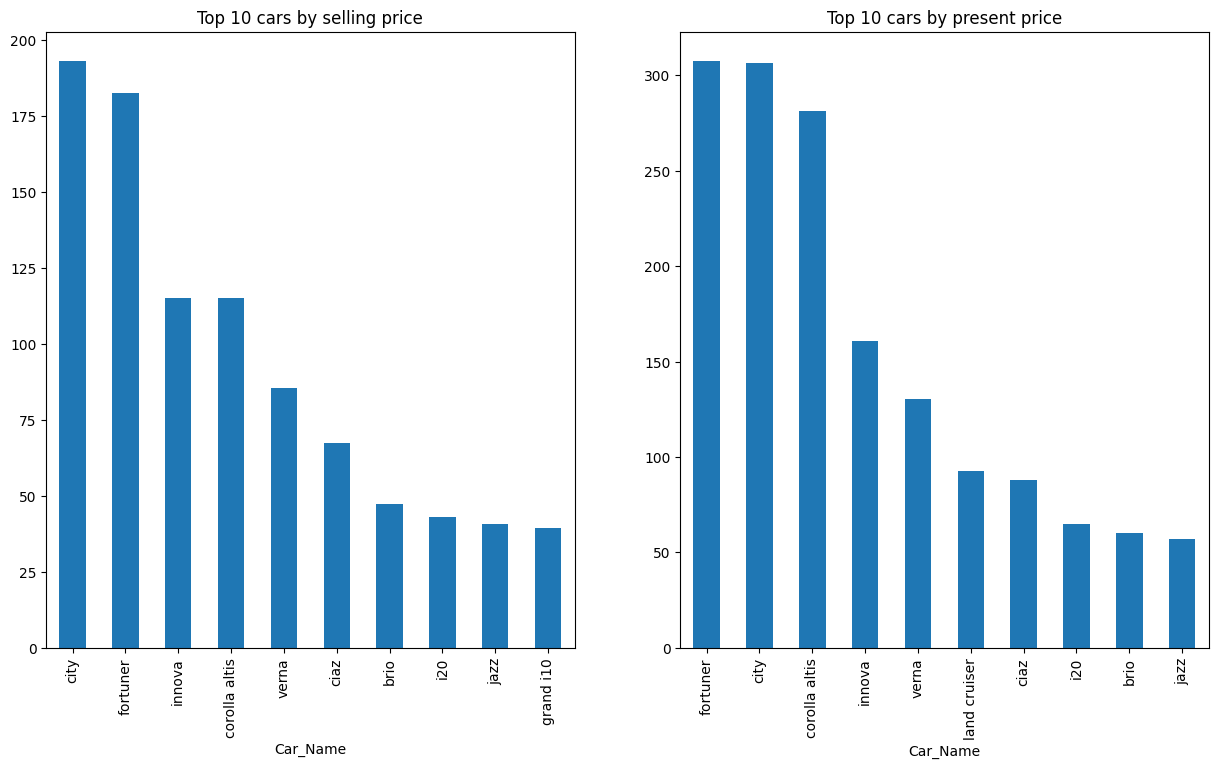

In [82]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

#top 10 cars by selling price
df.groupby('Car_Name')['Selling_Price'].sum().sort_values(ascending=False).head(10).plot(kind='bar', ax=ax[0])
ax[0].set_title('Top 10 cars by selling price')

#top 10 cars by present price
df.groupby('Car_Name')['Present_Price'].sum().sort_values(ascending=False).head(10).plot(kind='bar', ax=ax[1])
ax[1].set_title('Top 10 cars by present price')

### Year vs Price

Text(0.5, 1.0, 'Variation of present price with year')

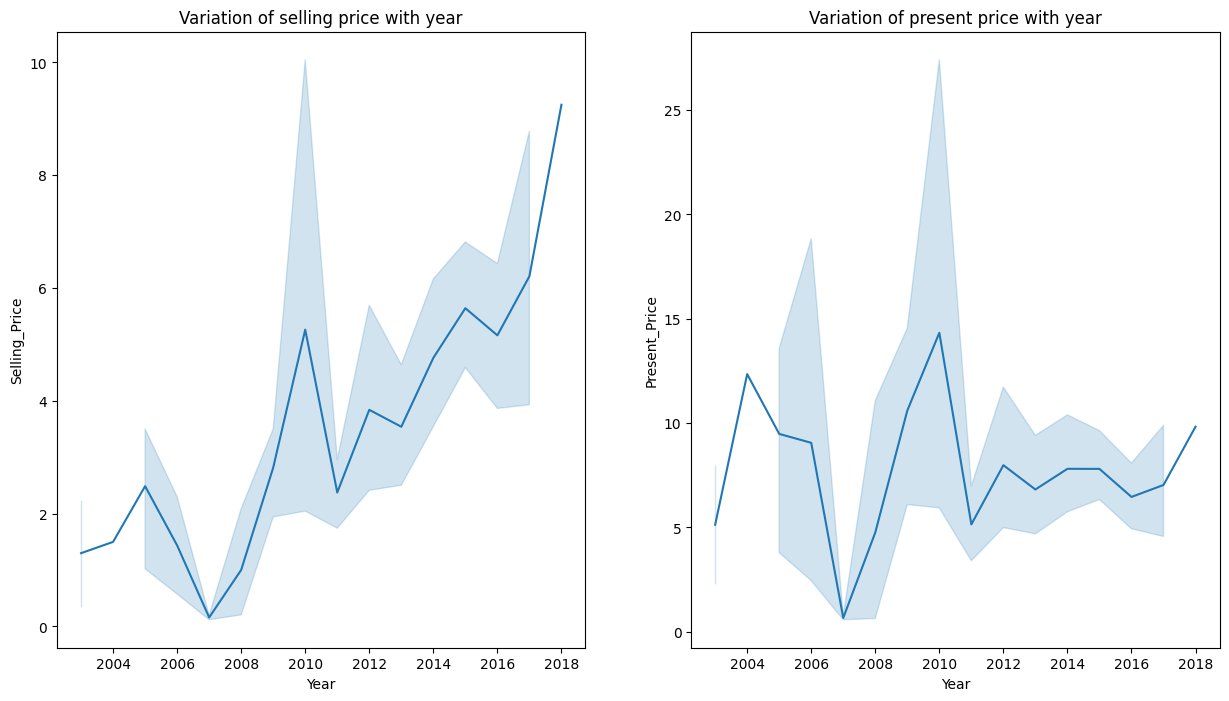

In [83]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

#varaition of selling price with year
sns.lineplot(x='Year', y='Selling_Price', data=df, ax=ax[0]).set_title('Variation of selling price with year')

#variation of present price with year
sns.lineplot(x='Year', y='Present_Price', data=df, ax=ax[1]).set_title('Variation of present price with year')

### Kilometers driven vs Price

Text(0.5, 1.0, 'Variation of present price with kilometer driven')

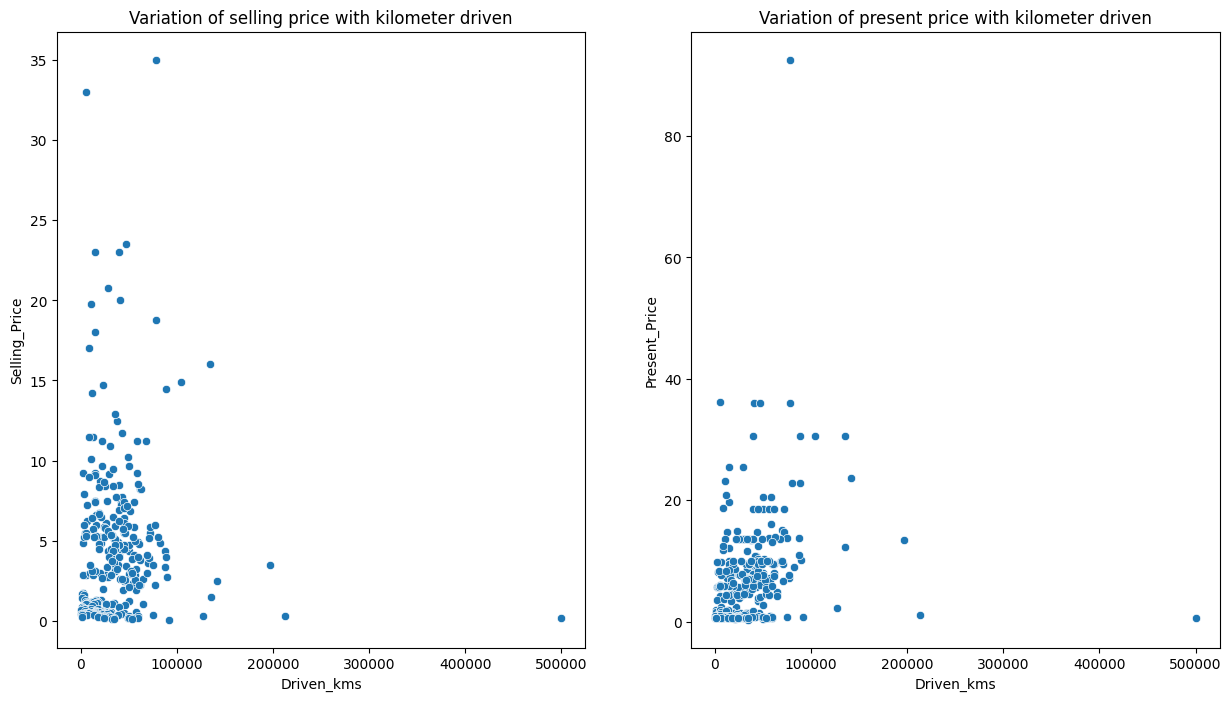

In [84]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

#variation of selling price with kilometer driven
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df, ax=ax[0]).set_title('Variation of selling price with kilometer driven')

#variation of present price with kilometer driven
sns.scatterplot(x='Driven_kms', y='Present_Price', data=df, ax=ax[1]).set_title('Variation of present price with kilometer driven')

### Fuel Type vs Price

Text(0.5, 1.0, 'Variation of present price with fuel type')

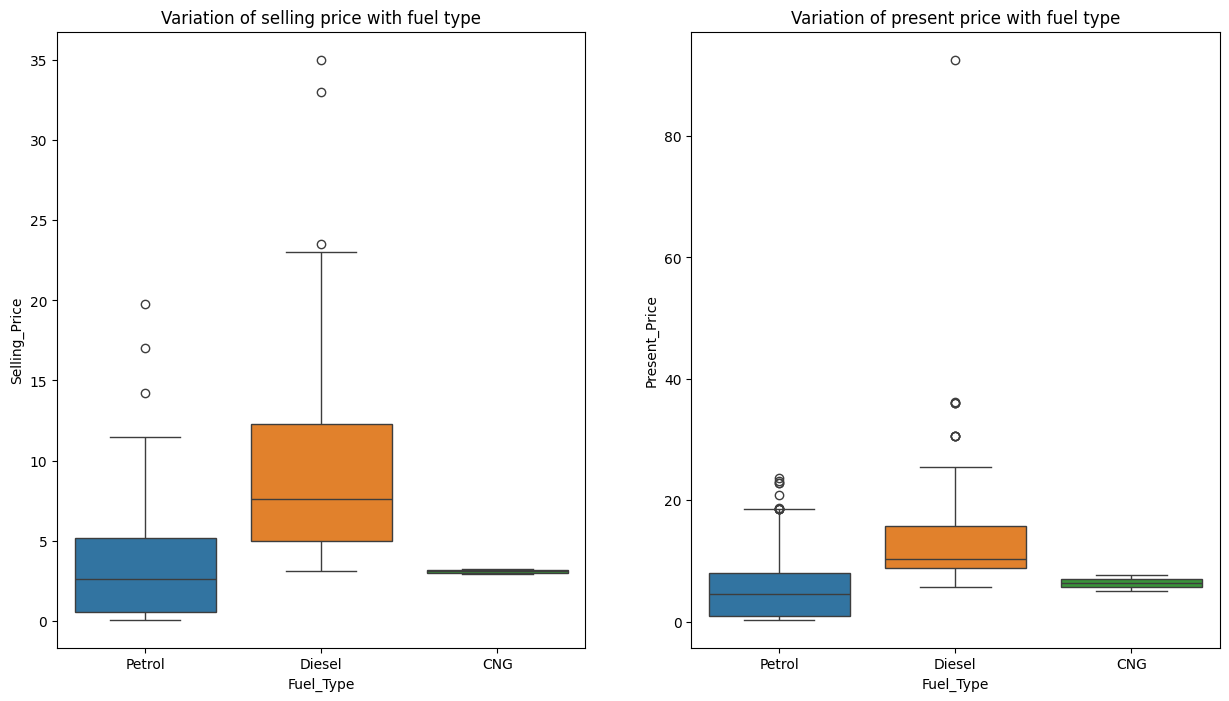

In [85]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

#variation of selling price with fuel type
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, ax=ax[0], hue = 'Fuel_Type').set_title('Variation of selling price with fuel type')

#variation of present price with fuel type
sns.boxplot(x='Fuel_Type', y='Present_Price', data=df, ax=ax[1], hue = 'Fuel_Type').set_title('Variation of present price with fuel type')

### Seller Type vs Price

Text(0.5, 1.0, 'Variation of present price with Selling type')

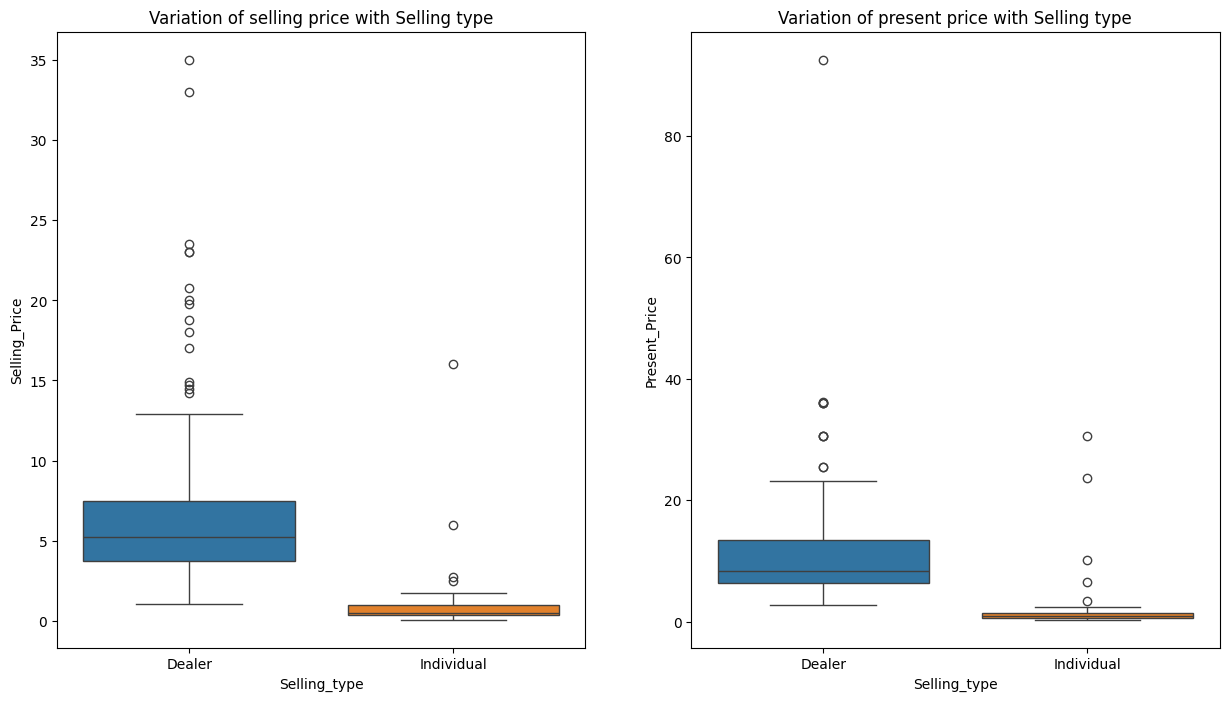

In [86]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

#variation of selling price with Selling_type
sns.boxplot(x='Selling_type', y='Selling_Price', data=df, ax=ax[0], hue = 'Selling_type').set_title('Variation of selling price with Selling type')

#variation of present price with Selling_type
sns.boxplot(x='Selling_type', y='Present_Price', data=df, ax=ax[1], hue = 'Selling_type').set_title('Variation of present price with Selling type')

### Transmission vs Price

Text(0.5, 1.0, 'Variation of present price with transmission')

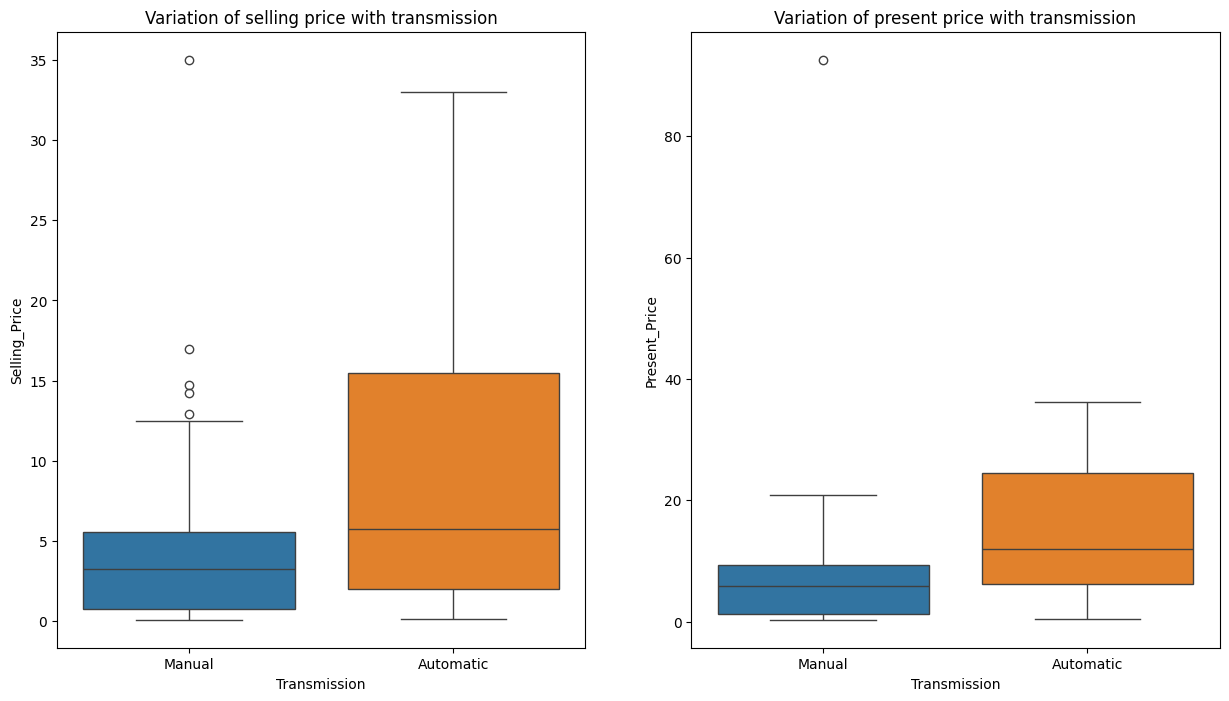

In [87]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

#variation of selling price with transmission
sns.boxplot(x='Transmission', y='Selling_Price', data=df, ax=ax[0], hue = 'Transmission').set_title('Variation of selling price with transmission')

#variation of present price with transmission
sns.boxplot(x='Transmission', y='Present_Price', data=df, ax=ax[1], hue = 'Transmission').set_title('Variation of present price with transmission')

### Owner vs Price

Text(0.5, 1.0, 'Variation of present price with owner')

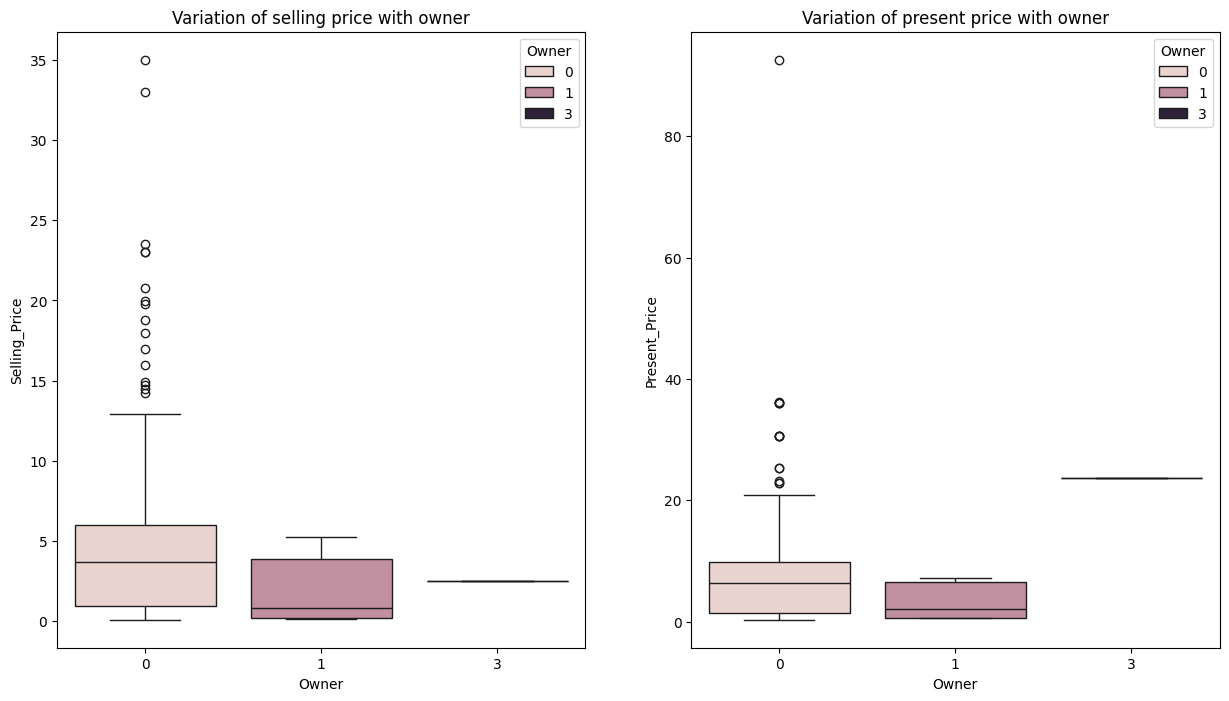

In [88]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

#variation of selling price with owner
sns.boxplot(x='Owner', y='Selling_Price', data=df, ax=ax[0], hue = 'Owner').set_title('Variation of selling price with owner')

#variation of present price with owner
sns.boxplot(x='Owner', y='Present_Price', data=df, ax=ax[1], hue = 'Owner').set_title('Variation of present price with owner')

## Data Preprocessing 2

The Car_Name has so many unique values, which make it difficult to train the machine learning model. So, we will drop this column, in order to reduce the parameters of the model.

In [89]:
#droping the car name column
df.drop('Car_Name', axis=1, inplace=True)

### Label Encoding

In [90]:
from sklearn.preprocessing import LabelEncoder

#columns for label encoding
cols = df.select_dtypes(include='object').columns

#label encoding object
le = LabelEncoder()

#applying label encoding
for i in cols:
    df[i] = le.fit_transform(df[i])
    print(i, df[i].unique())

Fuel_Type [2 1 0]
Selling_type [0 1]
Transmission [1 0]


### Coorelation Matrix Heatmap

<Axes: >

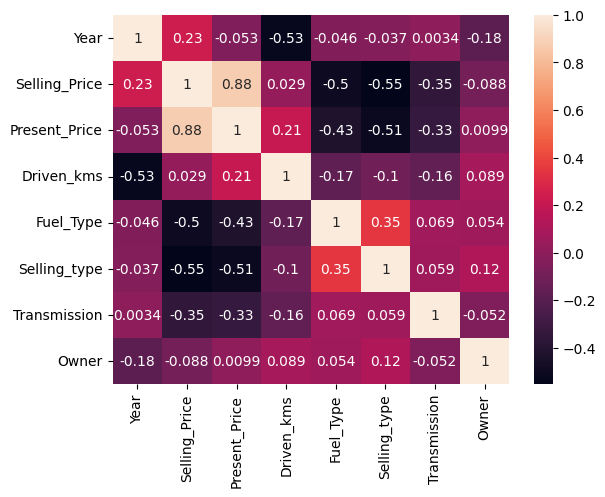

In [91]:
sns.heatmap(df.corr(), annot=True)

## Train Test Split

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Selling_Price', axis=1), df['Selling_Price'], test_size=0.2, random_state=42)

## Model Building

I will using the following algorithms to build the models:

- Desicion Tree Regressor
- Random Forest Regressor

### Decision Tree Regressor

In [93]:
from sklearn.tree import DecisionTreeRegressor

#Decision Tree Regressor object
dt = DecisionTreeRegressor()

#### Hyperparameter Tuning using GridSearchCV

In [94]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'max_depth': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'random_state': [0,42]
}

#Grid Search object
grid = GridSearchCV(dt, para, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


e:\Python\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

In [95]:
#decision tree regressor object with best parameters
dt = DecisionTreeRegressor(max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=0)

#fitting the decision tree regressor object
dt.fit(X_train, y_train)

#training accuracy
print(dt.score(X_train, y_train))

#prediction on test data
dt_pred = dt.predict(X_test)

0.8127778422312646


### Random Forest Regressor

In [96]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest Regressor object
rf = RandomForestRegressor()

#### Hyperparameter Tuning using GridSearchCV

In [97]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'n_estimators': [100,200],
    'max_depth': [2,4,6],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [2,4,6],
    'random_state': [0,42]
}

#Grid Search object
grid = GridSearchCV(rf, para, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 0}


e:\Python\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [98]:
#random forest regressor object with best parameters
rf = RandomForestRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=0)

#fitting the random forest regressor object
rf.fit(X_train, y_train)

#training accuracy
print(rf.score(X_train, y_train))

#prediction on test data
y_pred = rf.predict(X_test)

0.9505984366262189


## Model Evaluation

### Distribution Plot

C:\Users\Dell\AppData\Local\Temp\ipykernel_860\312768623.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, color='r', label='Actual', hist = False)
C:\Users\Dell\AppData\Local\Temp\ipykernel_860\312768623.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt_pre

<Axes: xlabel='Selling_Price', ylabel='Density'>

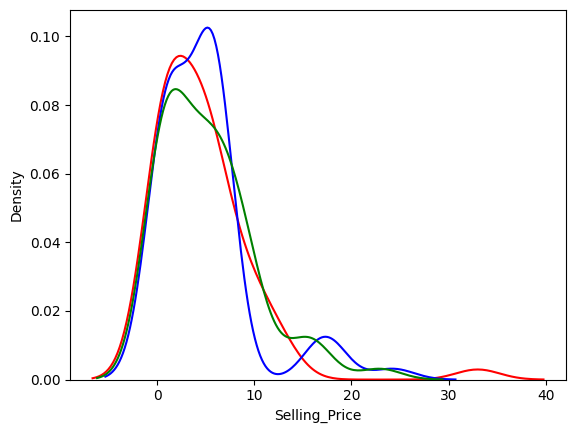

In [101]:
ax = sns.distplot(y_test, color='r', label='Actual', hist = False)
#descision tree regressor
sns.distplot(dt_pred, color='b', label='Predicted', ax=ax, hist = False)
#random forest regressor
sns.distplot(y_pred, color='g', label='Predicted', ax=ax, hist = False)

### Model Metrics

In [104]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#decision tree regressor
print('Decision Tree Regressor')
print('Mean Squared Error: ', mean_squared_error(y_test, dt_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dt_pred))
print('R2 Score: ', r2_score(y_test, dt_pred))
print('\n')
#random forest regressor
print('Random Forest Regressor')
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Decision Tree Regressor
Mean Squared Error:  15.857485535955778
Mean Absolute Error:  2.2808490157116004
R2 Score:  0.3847311450436749


Random Forest Regressor
Mean Squared Error:  10.159339309688956
Mean Absolute Error:  1.395447827308639
R2 Score:  0.6058186494944606
